<a href="https://colab.research.google.com/github/math-maven/introduction2pytorch/blob/main/introduction_to_pytorch_06_variational_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
torch.cuda.is_available()

False

In [ ]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

In [ ]:
device

'cpu'

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

In [ ]:
train_dataset = torchvision.datasets.FashionMNIST(root = '/content/data', download =True,train=True,transform = transform  )
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 32,shuffle =True)

100%|██████████| 26421880/26421880 [00:01<00:00, 19201732.43it/s]


Extracting /content/data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 335951.81it/s]


Extracting /content/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6103793.52it/s]


Extracting /content/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15982440.41it/s]

Extracting /content/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/data/FashionMNIST/raw



In [ ]:
# test_dataset = torchvision.datasets.MNIST(root = '/content/data', download =True,train=False,transform = transform  )
# test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 32,shuffle =False)

100%|██████████| 9912422/9912422 [00:00<00:00, 111597967.63it/s]

Extracting /content/data/MNIST/raw/train-images-idx3-ubyte.gz to /content/data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 94859587.96it/s]


Extracting /content/data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 143337507.44it/s]

Extracting /content/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 12435071.00it/s]

Extracting /content/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/data/MNIST/raw



(28,28) >(784) .... 784*(784,128)>128 , 128 *(128,10) >10

In [ ]:

class VAE(nn.Module):
    def __init__(self,latent_dim):
        super(VAE,self).__init__()
        self.encoder = nn.Sequential(
        nn.Flatten(),
        nn.Linear(784,256),
        nn.ReLU(),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Linear(128,64),
        )
        self.mu_layer= nn.Linear(64,latent_dim)
        self.log_sigma_layer= nn.Linear(64,latent_dim)

        self.decoder =  nn.Sequential(
        nn.Linear(latent_dim,128),
        nn.ReLU(),
        nn.Linear(128,256),
        nn.ReLU(),
        nn.Linear(256,784),
        nn.Sigmoid(),
        nn.Unflatten(1,(1,28,28)),
        )
    def sampler(self,mu,log_sigma):
        sample = mu+torch.exp(log_sigma)*torch.randn_like(log_sigma)
        return sample

    def forward(self,x):
        code = self.encoder(x)
        mu = self.mu_layer(code)
        log_sigma = self.log_sigma_layer(code)
        z = self.sampler(mu,log_sigma)

        outputs = self.decoder(z)

        return outputs,mu,log_sigma




In [ ]:
model = VAE(2)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [ ]:
def loss_func(outputs, target,mu,log_sigma):
    loss1 = nn.functional.binary_cross_entropy(outputs,target,reduction = 'sum')
    kl_loss = torch.sum(-log_sigma-0.5+0.5*(log_sigma.exp()+mu.pow(2)))
    total_loss = loss1+kl_loss
    return total_loss

In [ ]:
num_epochs =3
for epoch in range(num_epochs):
    for i,(images ,_) in enumerate(train_loader) :
        images = images.to(device)
        outputs,mu,log_sigma = model(images)
        loss = loss_func(outputs,images,mu,log_sigma)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i%100==0:
            print(f"epoch: {epoch} , batch {i} : loss :{loss}")



epoch: 0 , batch 0 : loss :17371.625
epoch: 0 , batch 100 : loss :9999.5830078125
epoch: 0 , batch 200 : loss :10032.6259765625
epoch: 0 , batch 300 : loss :9833.931640625
epoch: 0 , batch 400 : loss :8799.5322265625
epoch: 0 , batch 500 : loss :9071.892578125
epoch: 0 , batch 600 : loss :9832.4384765625
epoch: 0 , batch 700 : loss :8569.62109375
epoch: 0 , batch 800 : loss :9009.833984375
epoch: 0 , batch 900 : loss :8916.6484375
epoch: 0 , batch 1000 : loss :9077.1416015625
epoch: 0 , batch 1100 : loss :9783.029296875
epoch: 0 , batch 1200 : loss :8932.9501953125
epoch: 0 , batch 1300 : loss :9041.9453125
epoch: 0 , batch 1400 : loss :9161.134765625
epoch: 0 , batch 1500 : loss :9273.705078125
epoch: 0 , batch 1600 : loss :8149.8876953125
epoch: 0 , batch 1700 : loss :8859.255859375
epoch: 0 , batch 1800 : loss :8823.0263671875
epoch: 1 , batch 0 : loss :8396.4716796875
epoch: 1 , batch 100 : loss :8969.865234375
epoch: 1 , batch 200 : loss :7904.13818359375
epoch: 1 , batch 300 : lo

In [ ]:
latent_dim =2

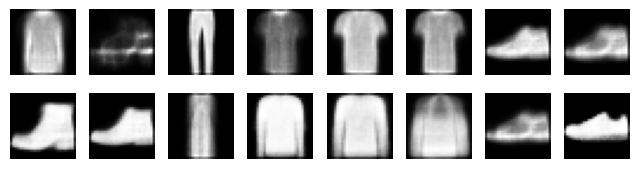

In [ ]:
import torch
import matplotlib.pyplot as plt

# Create a VAE instance and load the trained model
# vae = VAE(input_dim, latent_dim)
# vae.load_state_dict(torch.load('vae_mnist.pth'))
model.eval()

# Function to generate images from random samples
def generate_samples(num_samples=16):
    with torch.no_grad():
        # Generate random samples from the latent space
        z = torch.randn(num_samples, latent_dim)

        # Decode the samples to generate images
        generated_images = model.decoder(z)

    return generated_images

# Generate and visualize images
samples = generate_samples()
samples = samples.view(-1, 28, 28).numpy()  # Reshape to 28x28 images

plt.figure(figsize=(8, 2))
for i in range(samples.shape[0]):
    plt.subplot(2, 8, i + 1)
    plt.imshow(samples[i], cmap='gray')
    plt.axis('off')

plt.show()


In [ ]:
2/784

0.002551020408163265

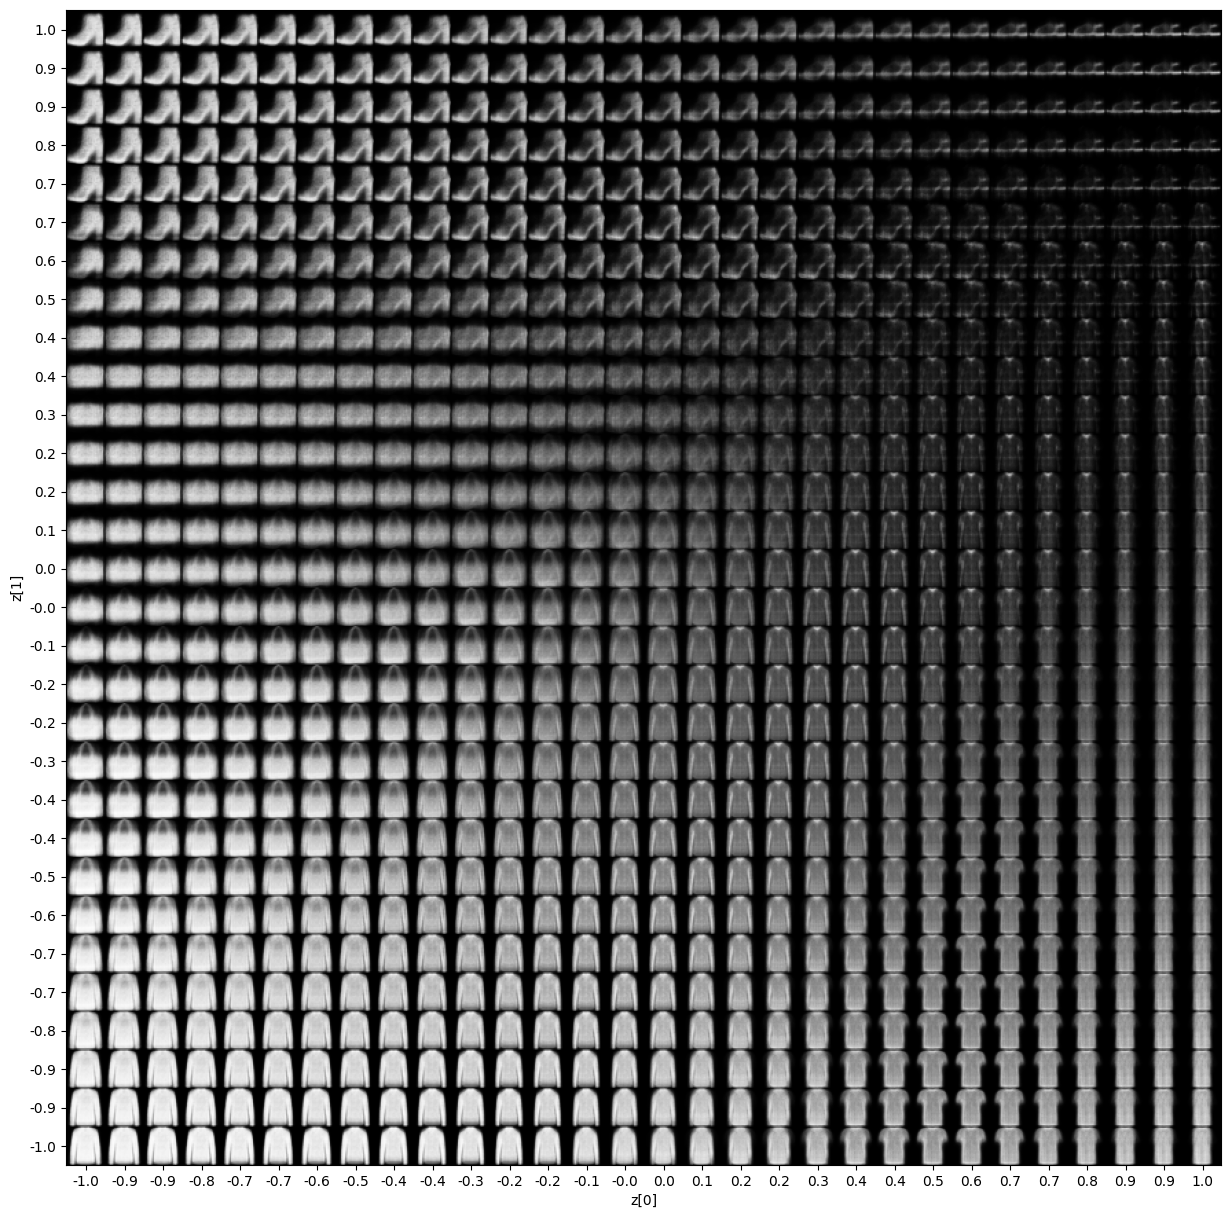

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_latent_space(model, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = model.decoder(torch.tensor(z_sample,dtype=torch.float32))
            digit = x_decoded[0].reshape(digit_size, digit_size).detach().numpy()
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(model)


In [ ]:
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)


NameError: ignored

In [ ]:
first_elements, second_elements = zip(*train_dataset)
x_train  = list(first_elements)
y_train  = list(second_elements)

torch.Size([60000, 1, 28, 28])


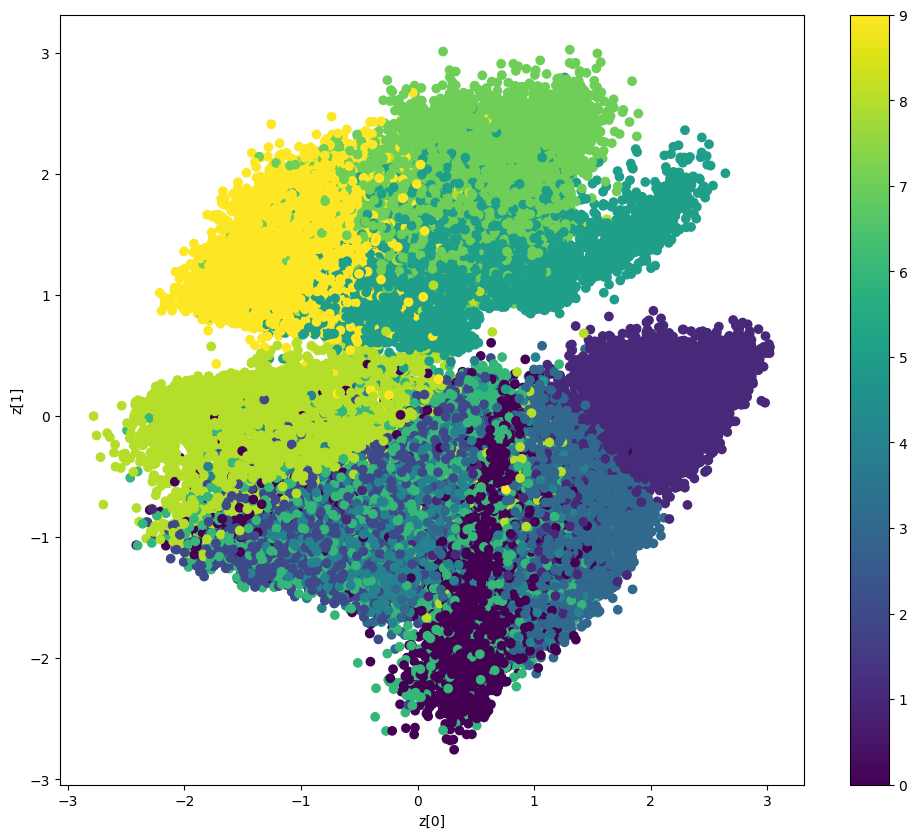

In [ ]:
def plot_label_clusters(model, data, labels):
    # display a 2D plot of the digit classes in the latent space
    x = model.encoder(data)
    mu = model.mu_layer(x)
    log_sigma = model.log_sigma_layer(x)
    z_mean = model.sampler(mu, log_sigma)




    plt.figure(figsize=(12, 10))

    plt.scatter(z_mean[:, 0].detach().numpy(), z_mean[:, 1].detach().numpy(), c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()



# x_train = torch.stack(x_train)
# x_train = x_train.view(-1, input_dim)
print(x_train.shape)

plot_label_clusters(model, x_train, torch.tensor(y_train))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the model to evaluation mode (important for batch normalization and dropout)
model.eval()

# Choose 5 random samples from your training dataset
num_samples = 5
sample_indices = np.random.randint(0, len(train_dataset), num_samples)

# Create subplots to display the original images and their reconstructions
fig, axes = plt.subplots(2, num_samples, figsize=(12, 4))

with torch.no_grad():
    for i, idx in enumerate(sample_indices):
        input_image, _ = train_dataset[idx]  # Assuming train_dataset contains (image, label) pairs
        # input_image = torch.rand_like(input_image)
        input_image = input_image.unsqueeze(0)  # Add batch dimension
        input_image = input_image.to(device)
        reconstructed_image = model.encoder(input_image)  # Pass the input through the autoencoder
        input_image = input_image.squeeze(0)  # Remove batch dimension
        #reconstructed_image = reconstructed_image.squeeze(0)
        reconstructed_image = reconstructed_image.reshape(1,8,8)

        # Plot original image
        axes[0, i].imshow(input_image[0].cpu(), cmap='gray')
        axes[0, i].set_title("Original")
        axes[0, i].axis('off')

        # Plot reconstructed image
        axes[1, i].imshow(reconstructed_image[0].cpu(), cmap='gray')
        axes[1, i].set_title("Reconstructed")
        axes[1, i].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

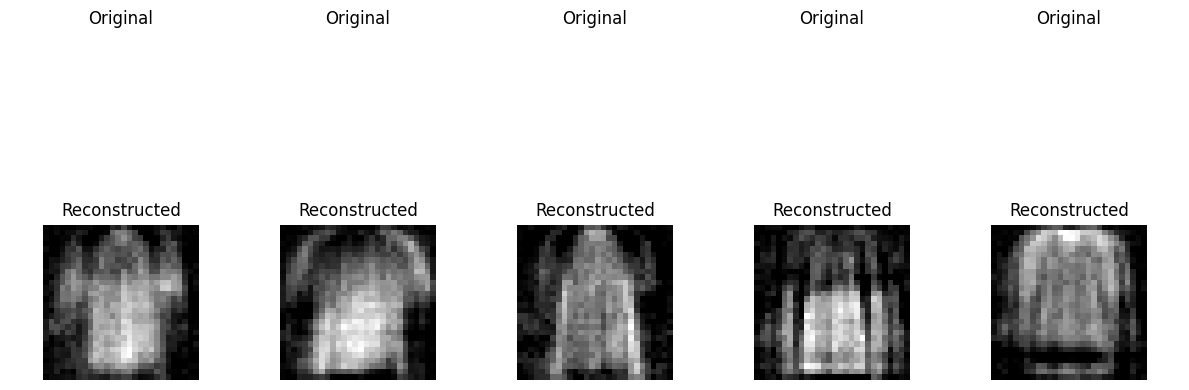

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the model to evaluation mode (important for batch normalization and dropout)
model.eval()

# Choose 5 random samples from your training dataset
num_samples = 5
sample_indices = np.random.randint(0, len(train_dataset), num_samples)

# Create subplots to display the original images and their reconstructions
fig, axes = plt.subplots(2, num_samples, figsize=(12, 4))

with torch.no_grad():
    for i, idx in enumerate(sample_indices):
        input_image, _ = train_dataset[idx]  # Assuming train_dataset contains (image, label) pairs
        input_image = torch.rand(64)
        input_image = input_image.unsqueeze(0)  # Add batch dimension
        input_image = input_image.to(device)
        reconstructed_image = model.decoder(input_image)  # Pass the input through the autoencoder
        input_image = input_image.squeeze(0)  # Remove batch dimension
        reconstructed_image = reconstructed_image.squeeze(0)
        # print(reconstructed_image.shape)
        # reconstructed_image = reconstructed_image.reshape(1,28,28)

        # Plot original image
        # axes[0, i].imshow(input_image[0].cpu(), cmap='gray')
        axes[0, i].set_title("Original")
        axes[0, i].axis('off')
        reconstructed_image = torch.clip(reconstructed_image,0,1)
        # Plot reconstructed image
        axes[1, i].imshow(reconstructed_image[0].cpu(), cmap='gray')
        axes[1, i].set_title("Reconstructed")
        axes[1, i].axis('off')

# Show the plot
plt.tight_layout()
plt.show()